# Test different models to categorize

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plots_fabi import *
import sys
# Add functions path
sys.path.append('../Functions')
from time import time
from sklearn.model_selection import cross_val_score

### Load Dataset

In [2]:
from datasets import load_stratified_dataset
df = load_stratified_dataset(path='../Datasets/dataset_categories/dataset_categories_train.csv', labels='category', samples_per_label=1000, random_seed=11)
df.shape

(7000, 8)

### Save all results as dictionaries

In [3]:
results = []

### Prepare Dataset
Split into train and test set, use Tfidf vectorizer to tokenize data. Also use already with Spacy edited and lemmatized texts given in the dataset as text_lem.

In [4]:
# TfidfVectorizer generates bag of words
from sklearn.feature_extraction.text import TfidfVectorizer

# sublinear_tf: use logarithmic form for frequency
# min_df: minimum numbers of documents a word must be present to keep it
# ngram_range: number of ngrams to use
# stopwords: remove all common pronouns in given language

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1',
                        ngram_range=(1, 2), stop_words='english')

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text_lem'], df['category'], random_state = 42)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

### Train different Methods

In [6]:
from sklearn.naive_bayes import MultinomialNB
def nb():
    clf = MultinomialNB()

    train_start = time()
    clf.fit(X_train_tfidf, y_train)
    train_time = time() - train_start

    pred_start = time()
    #test_score = clf.score(X_test_tfidf, y_test) * 100
    test_score = cross_val_score(clf, X_train_tfidf, y_train, cv=5).mean() * 100
    train_score = clf.score(X_train_tfidf, y_train) * 100
    pred_time = time() - pred_start

    return {
        'model': 'Mult Naive Bayes',
        'data': 'tfidf',
        'train_acc': train_score,
        'test_acc': test_score,
        'train_time': train_time,
        'pred_time': pred_time
    }
    
results.append(nb())

In [7]:
from sklearn.svm import SVC
def svc():
    clf = SVC(random_state=42, max_iter=100000)

    train_start = time()
    clf.fit(X_train_tfidf, y_train)
    train_time = time() - train_start

    pred_start = time()
    #test_score = clf.score(X_test_tfidf, y_test) * 100
    test_score = cross_val_score(clf, X_train_tfidf, y_train, cv=5).mean() * 100
    train_score = clf.score(X_train_tfidf, y_train) * 100
    pred_time = time() - pred_start

    return {
        'model': 'SVC',
        'data': 'tfidf',
        'train_acc': train_score,
        'test_acc': test_score,
        'train_time': train_time,
        'pred_time': pred_time
    }

results.append(svc())

In [8]:
from xgboost import XGBClassifier
def xgb():
    clf = XGBClassifier(random_state=42)

    train_start = time()
    clf.fit(X_train_tfidf, y_train)
    train_time = time() - train_start

    pred_start = time()
    #test_score = clf.score(X_test_tfidf, y_test) * 100
    test_score = cross_val_score(clf, X_train_tfidf, y_train, cv=5).mean() * 100
    train_score = clf.score(X_train_tfidf, y_train) * 100
    pred_time = time() - pred_start

    return {
        'model': 'XGB',
        'data': 'tfidf',
        'train_acc': train_score,
        'test_acc': test_score,
        'train_time': train_time,
        'pred_time': pred_time
    }

results.append(xgb())

In [9]:
from sklearn.svm import LinearSVC
def lin_svc():
    clf = LinearSVC(random_state=42, dual=False, max_iter=10000)

    train_start = time()
    clf.fit(X_train_tfidf, y_train)
    train_time = time() - train_start

    pred_start = time()
    #test_score = clf.score(X_test_tfidf, y_test) * 100
    test_score = cross_val_score(clf, X_train_tfidf, y_train, cv=5).mean() * 100
    train_score = clf.score(X_train_tfidf, y_train) * 100
    pred_time = time() - pred_start

    return {
        'model': 'Linear SVC',
        'data': 'tfidf',
        'train_acc': train_score,
        'test_acc': test_score,
        'train_time': train_time,
        'pred_time': pred_time
    }

results.append(lin_svc())

In [10]:
from sklearn.linear_model import LogisticRegression
def log():
    clf = LogisticRegression(random_state=42, max_iter=100000)

    train_start = time()
    clf.fit(X_train_tfidf, y_train)
    train_time = time() - train_start

    pred_start = time()
    #test_score = clf.score(X_test_tfidf, y_test) * 100
    test_score = cross_val_score(clf, X_train_tfidf, y_train, cv=5).mean() * 100
    train_score = clf.score(X_train_tfidf, y_train) * 100
    pred_time = time() - pred_start

    return {
        'model': 'Logistic Reg',
        'data': 'tfidf',
        'train_acc': train_score,
        'test_acc': test_score,
        'train_time': train_time,
        'pred_time': pred_time
    }

results.append(log())

In [11]:
from sklearn.ensemble import RandomForestClassifier
def rf():
    clf = RandomForestClassifier(random_state=42)

    train_start = time()
    clf.fit(X_train_tfidf, y_train)
    train_time = time() - train_start

    pred_start = time()
    #test_score = clf.score(X_test_tfidf, y_test) * 100
    test_score = cross_val_score(clf, X_train_tfidf, y_train, cv=5).mean() * 100
    train_score = clf.score(X_train_tfidf, y_train) * 100
    pred_time = time() - pred_start

    return {
        'model': 'Random Forest',
        'data': 'tfidf',
        'train_acc': train_score,
        'test_acc': test_score,
        'train_time': train_time,
        'pred_time': pred_time
    }

results.append(rf())

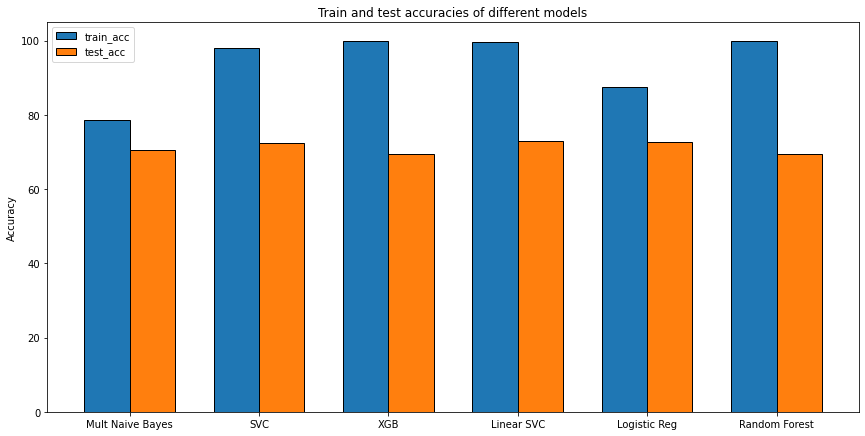

In [12]:
x = [i['model'] for i in results]
y1 = [i['train_acc'] for i in results]
y2 = [i['test_acc'] for i in results]
y = {
    'train_acc': y1,
    'test_acc': y2}

bar_adjacent_labels(
    x, 
    y, 
    title='Train and test accuracies of different models',
    ylabel='Accuracy'
)

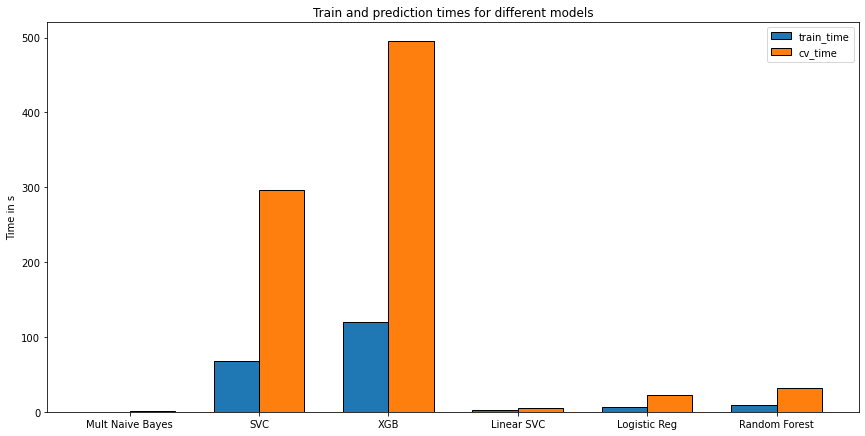

In [13]:
x = [i['model'] for i in results]
y1 = [i['train_time'] for i in results]
y2 = [i['pred_time'] for i in results]

y = {
    'train_time': y1,
    'cv_time': y2}

bar_adjacent_labels(
    x, 
    y, 
    title='Train and prediction times for different models',
    ylabel='Time in s'
)

### Accuracy in dependence of training size

In [14]:
models = {
    'Mult Naive Bayes': nb,
    #'SVC': svc,
    'XGB': xgb,
    'Linear SVC': lin_svc,
    'Logistic Reg': log,
    'Random Forest': rf
}

In [15]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1',
                        ngram_range=(1, 2), stop_words='english')

samples = []
results = []
for num_samples in [100, 500, 1000, 2000]:
    start_time = time()
    
    samples.append(num_samples)
    result = {}
    
    ### Get and transform data data ###
    df = load_stratified_dataset(path='../Datasets/dataset_categories/dataset_categories_train.csv', labels='category', samples_per_label=num_samples, random_seed=42)

    X_train, X_test, y_train, y_test = train_test_split(df['text_lem'], df['category'], random_state = 42)

    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)

    ### Get model results ###
    for model in models.keys():
        result[model] = models[model]()
        
    results.append(result)
    
    print('Calculation with {} samples finished in {:.1f}s'.format(num_samples, time()-start_time))

Calculation with 100 samples finished in 38.7s
Calculation with 500 samples finished in 279.6s
Calculation with 1000 samples finished in 661.2s
Calculation with 2000 samples finished in 1646.8s


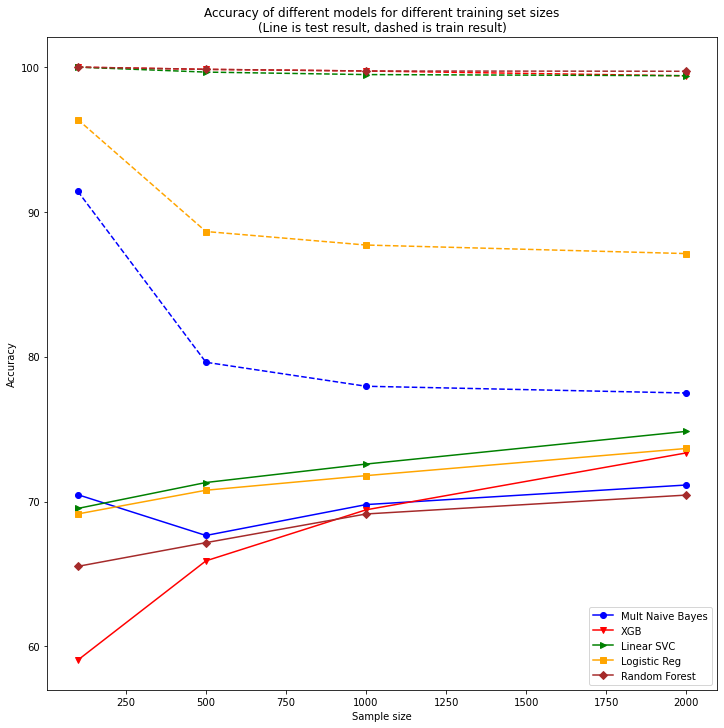

In [16]:
y1 = {}
y2 = {}

for model in models.keys():
    y1[model] = []
    y2[model] = []
    for sample in range(len(samples)):
        y1[model].append(results[sample][model]['train_acc'])
        y2[model].append(results[sample][model]['test_acc'])
        
plt.figure(figsize=(12, 12))
colors = ['blue', 'red', 'green', 'orange', 'brown']
points = ['o', 'v', '>', 's', 'D', 'x']
count=0
for model in models.keys():
    plt.plot(samples, y1[model], c=colors[count], marker=points[count], linestyle='dashed')#, label=model+' train')
    plt.plot(samples, y2[model], c=colors[count], marker=points[count], label=model)
    count += 1
plt.legend()
plt.xlabel('Sample size')
plt.ylabel('Accuracy')
plt.title('Accuracy of different models for different training set sizes\n(Line is test result, dashed is train result)');

As expected, high variance can be reduced by higher sample size. Most promising model is LinearSVC.

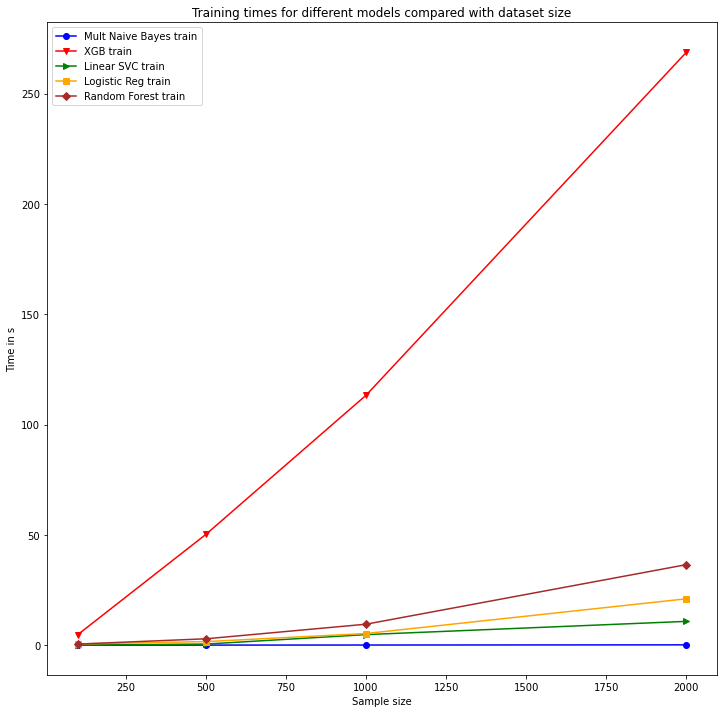

In [17]:
y1 = {}
y2 = {}

for model in models.keys():
    y1[model] = []
    y2[model] = []
    for sample in range(len(samples)):
        y1[model].append(results[sample][model]['train_time'])
        y2[model].append(results[sample][model]['pred_time'])
        
plt.figure(figsize=(12, 12))
colors = ['blue', 'red', 'green', 'orange', 'brown']
points = ['o', 'v', '>', 's', 'D', 'x']
count=0
for model in models.keys():
    plt.plot(samples, y1[model], c=colors[count], marker=points[count], label=model+' train')
    #plt.plot(samples, y2[model], c=colors[count], label=model+' test')
    count += 1
plt.legend()
plt.title('Training times for different models compared with dataset size')
plt.xlabel('Sample size')
plt.ylabel('Time in s');

## Regularization

In [34]:
df = load_stratified_dataset(path='../Datasets/dataset_categories/dataset_categories_train.csv', labels='category', samples_per_label=2500)
X_train, X_test, y_train, y_test = train_test_split(df['text_lem'], df['category'], random_state = 3, test_size=0.1)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [35]:
test_svc, train_svc, c_val_svc = [], [], []
for c in np.logspace(-1,0,10):
    clf = LinearSVC(random_state=42, dual=False, max_iter=10000, C=c)
    clf.fit(X_train_tfidf, y_train)
    test_, train_ = clf.score(X_test_tfidf, y_test), clf.score(X_train_tfidf, y_train)
    test_svc.append(test_)
    train_svc.append(train_)
    c_val_svc.append(c)

In [36]:
test_lr, train_lr, c_val_lr = [], [], []
for c in np.logspace(-1,1,10):
    clf = LogisticRegression(penalty='l2', C=c, max_iter=100000)
    clf.fit(X_train_tfidf, y_train)
    test_, train_ = clf.score(X_test_tfidf, y_test), clf.score(X_train_tfidf, y_train)
    test_lr.append(test_)
    train_lr.append(train_)
    c_val_lr.append(c)

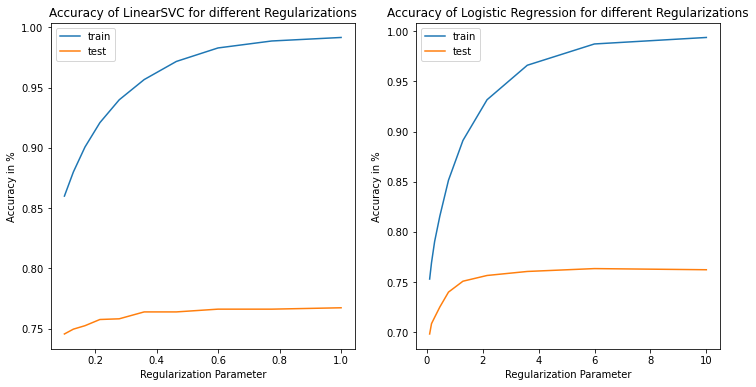

In [37]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].plot(c_val_svc, train_svc, label='train')
ax[0].plot(c_val_svc, test_svc, label='test')
ax[0].set_title('Accuracy of LinearSVC for different Regularizations')

ax[1].plot(c_val_lr, train_lr, label='train')
ax[1].plot(c_val_lr, test_lr, label='test')
ax[1].set_title('Accuracy of Logistic Regression for different Regularizations')

for a in ax:
    a.legend()
    a.set_xlabel('Regularization Parameter')
    a.set_ylabel('Accuracy in %')

***
Regularization could imply, that error occurs due to bias in train test split, not variance!
***

### Try on smaller outbalanced Dataset
Dataset with balanced publishers, see eda.

In [38]:
df = load_stratified_dataset(path='../Datasets/dataset_categories/dataset_categories_train_small.csv', labels='category', samples_per_label=2500)
X_train, X_test, y_train, y_test = train_test_split(df['text_lem'], df['category'], random_state = 3, test_size=0.1)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [39]:
test_svc, train_svc, c_val_svc = [], [], []
for c in np.logspace(-1,0,10):
    clf = LinearSVC(random_state=42, dual=False, max_iter=10000, C=c)
    clf.fit(X_train_tfidf, y_train)
    test_, train_ = clf.score(X_test_tfidf, y_test), clf.score(X_train_tfidf, y_train)
    test_svc.append(test_)
    train_svc.append(train_)
    c_val_svc.append(c)

In [40]:
test_lr, train_lr, c_val_lr = [], [], []
for c in np.logspace(-1,1,10):
    clf = LogisticRegression(penalty='l2', C=c, max_iter=100000)
    clf.fit(X_train_tfidf, y_train)
    test_, train_ = clf.score(X_test_tfidf, y_test), clf.score(X_train_tfidf, y_train)
    test_lr.append(test_)
    train_lr.append(train_)
    c_val_lr.append(c)

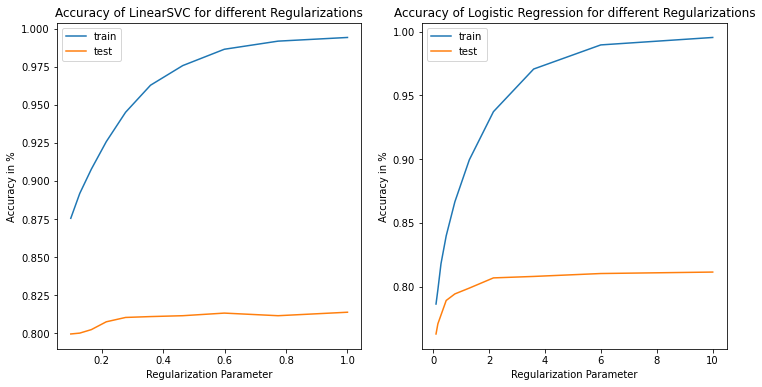

In [41]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].plot(c_val_svc, train_svc, label='train')
ax[0].plot(c_val_svc, test_svc, label='test')
ax[0].set_title('Accuracy of LinearSVC for different Regularizations')

ax[1].plot(c_val_lr, train_lr, label='train')
ax[1].plot(c_val_lr, test_lr, label='test')
ax[1].set_title('Accuracy of Logistic Regression for different Regularizations')

for a in ax:
    a.legend()
    a.set_xlabel('Regularization Parameter')
    a.set_ylabel('Accuracy in %')

***
Same bias error still occors. __Bias error not due to different publishers!__
***